Задание
1. Скачайте материалы к занятию.
2. Проанализируйте ряды и сделайте их стационарными.
3. Пришлите решение в виде ссылки на GitHub с ноутбуком.

Сначала импортируем все библиотеки:

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

# Перейдем к анализу

Загрузим датасеты:

In [26]:
series_daily = pd.read_csv('Series/daily-total-female-births-in-cal.csv')
series_airline = pd.read_csv("Series/international-airline-passengers.csv")
series_monthly_air = pd.read_csv('Series/mean-monthly-air-temperature-deg.csv')
series_boston = pd.read_csv('Series/monthly-boston-armed-robberies-j.csv')
series_sales_company = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
series_closings = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv").iloc[:,-1]

Посмотрим что мы загрузили:

In [3]:
series_daily[:3]

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30


In [4]:
series_airline[:3]

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [5]:
series_monthly_air[:3]

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4


In [6]:
series_boston[:3]

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50


In [7]:
series_sales_company[:3]

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73


In [8]:
series_closings[:3]

0    890.19
1    901.80
2    888.51
Name: Close, dtype: float64

Преобразуем данные

In [9]:
print('series_daily')
print(series_daily.info())
print('')
print('series_airline')
print(series_airline.info())
print('')
print('series_monthly_air')
print(series_monthly_air.info())
print('')
print('series_boston')
print(series_boston.info())
print('')
print('series_sales_company')
print(series_sales_company.info())
print('')
print('series_closings')
print(series_closings.info())

series_daily
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Count   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None

series_airline
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   Count   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None

series_monthly_air
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   240 non-null    object 
 1   Deg     240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
None

series_boston
<class 'pandas.core.f

Что мы будем делать:
*   Поменяем тип столбца с временными отсечками в datetime
*   Установим индексом данных столбец с временными отсечками и убедимся, что он монотонно возрастает

*Поменяем тип столбца с временными отсечками в datetime* Во всех датасетах формат данных год-месяц

series_daily изначально имеет правильный тип

In [28]:
series_daily['Date'] = pd.to_datetime(series_daily['Date'], format="%Y-%m-%d")

In [29]:
series_airline['Month'] = pd.to_datetime(series_airline['Month'], format="%Y-%m")
series_monthly_air['Month'] = pd.to_datetime(series_monthly_air['Month'], format="%Y-%m")
series_boston['Month'] = pd.to_datetime(series_boston['Month'], format="%Y-%m")
series_sales_company['Month'] = pd.to_datetime(series_sales_company['Month'], format="%Y-%m")

*Установим индексом данных столбец с временными отсечками и убедимся, что он монотонно возрастает*

In [30]:
series_daily.set_index('Date', inplace=True)
series_airline.set_index('Month', inplace=True)
series_monthly_air.set_index('Month', inplace=True)
series_boston.set_index('Month', inplace=True)
series_sales_company.set_index('Month', inplace=True)

In [31]:
print('series_daily ', series_daily.index.is_monotonic_increasing)
print('series_airline ', series_airline.index.is_monotonic_increasing)
print('series_monthly_air ', series_monthly_air.index.is_monotonic_increasing)
print('series_boston ', series_boston.index.is_monotonic_increasing)
print('series_sales_company ', series_sales_company.index.is_monotonic_increasing)
print('series_closings ', series_closings.index.is_monotonic_increasing)

series_daily  True
series_airline  True
series_monthly_air  True
series_boston  True
series_sales_company  True
series_closings  True


Посмотрим что у нас получилось итого:

In [32]:
series_daily[:3]

,Count
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


In [33]:
series_airline[:3]

,Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [34]:
series_monthly_air[:3]

,Deg
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4


In [35]:
series_boston[:3]

,Count
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50


In [36]:
series_sales_company[:3]

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73


In [37]:
series_closings[:3]

0    890.19
1    901.80
2    888.51
Name: Close, dtype: float64

In [38]:
print('series_daily')
print(series_daily.info())
print('')
print('series_airline')
print(series_airline.info())
print('')
print('series_monthly_air')
print(series_monthly_air.info())
print('')
print('series_boston')
print(series_boston.info())
print('')
print('series_sales_company')
print(series_sales_company.info())
print('')
print('series_closings')
print(series_closings.info())

series_daily
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None

series_airline
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

series_monthly_air
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None

series_boston
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 co

### Анализировать мы будем каждый датасет по-отдельности

In [39]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### series_daily

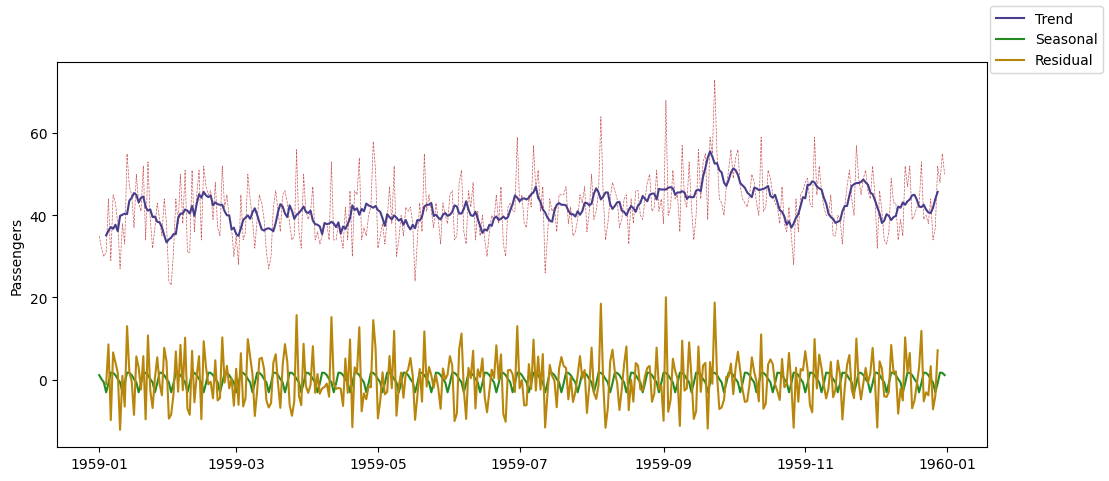

In [41]:
decomposed = seasonal_decompose(series_daily['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_daily['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


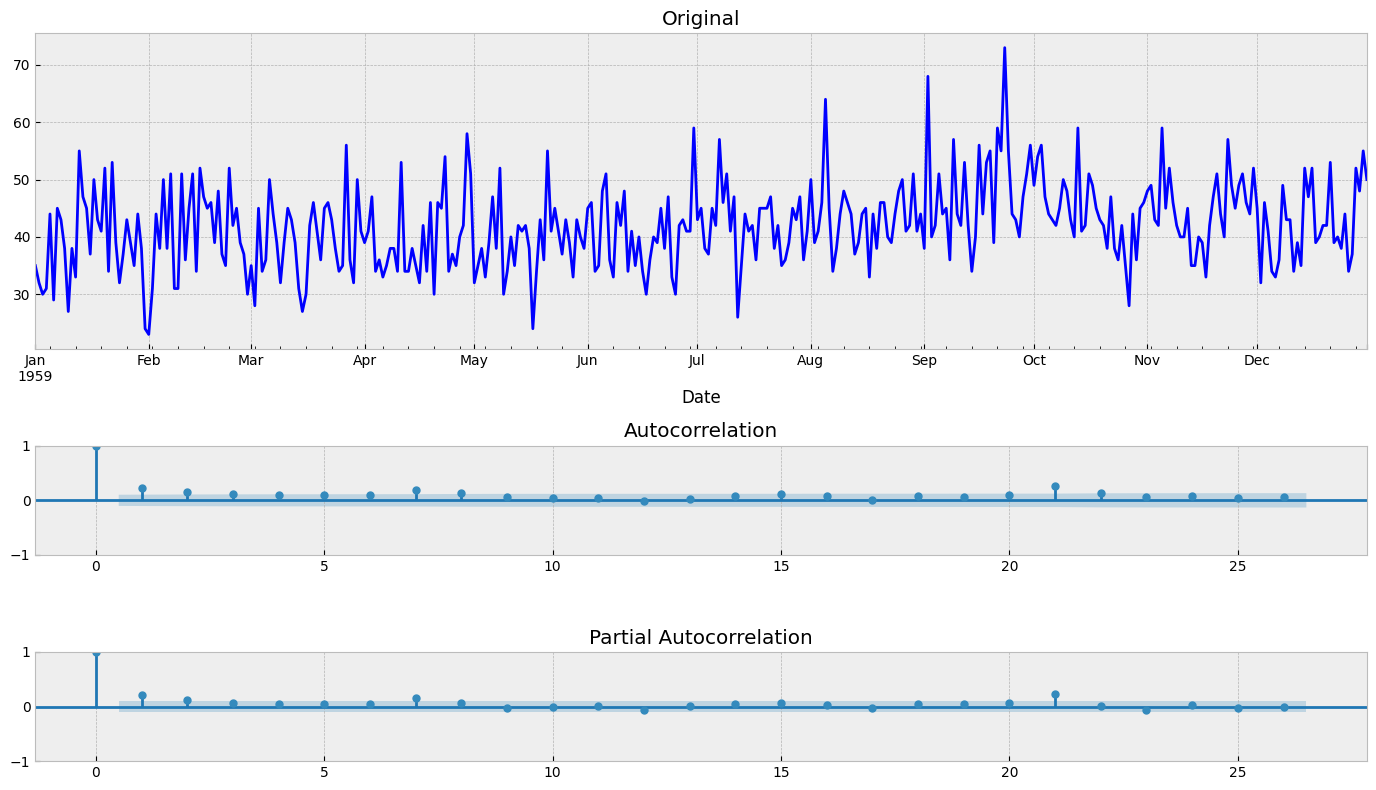

In [42]:
tsplot(series_daily['Count'])

In [46]:
adf_test = adfuller(series_daily['Count'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 5.2434129901498554e-05


Значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда

### series_airline

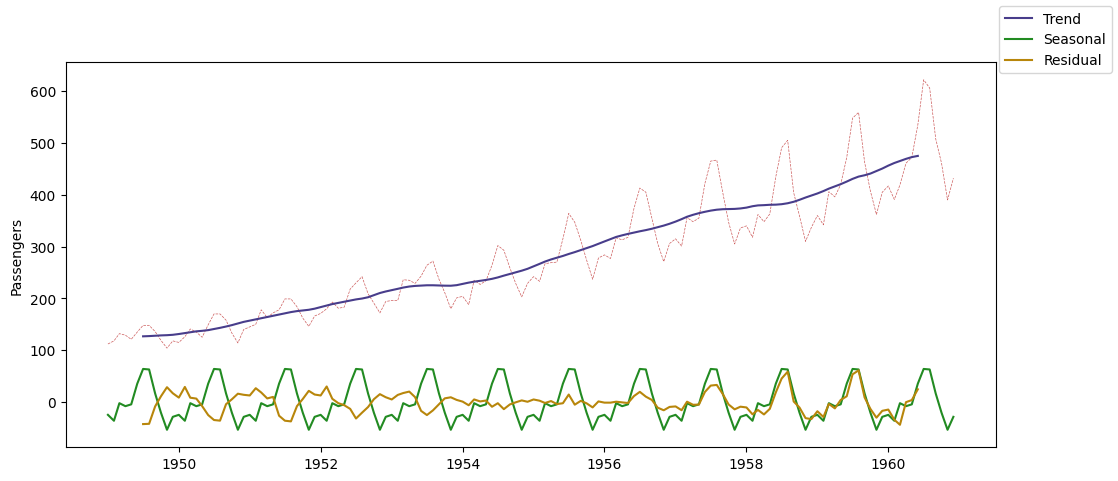

In [43]:
decomposed = seasonal_decompose(series_airline['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_airline['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

Мы видим, что в датасете series_airline: Присутствует возрастающий тренд и ежегодную сезонность

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


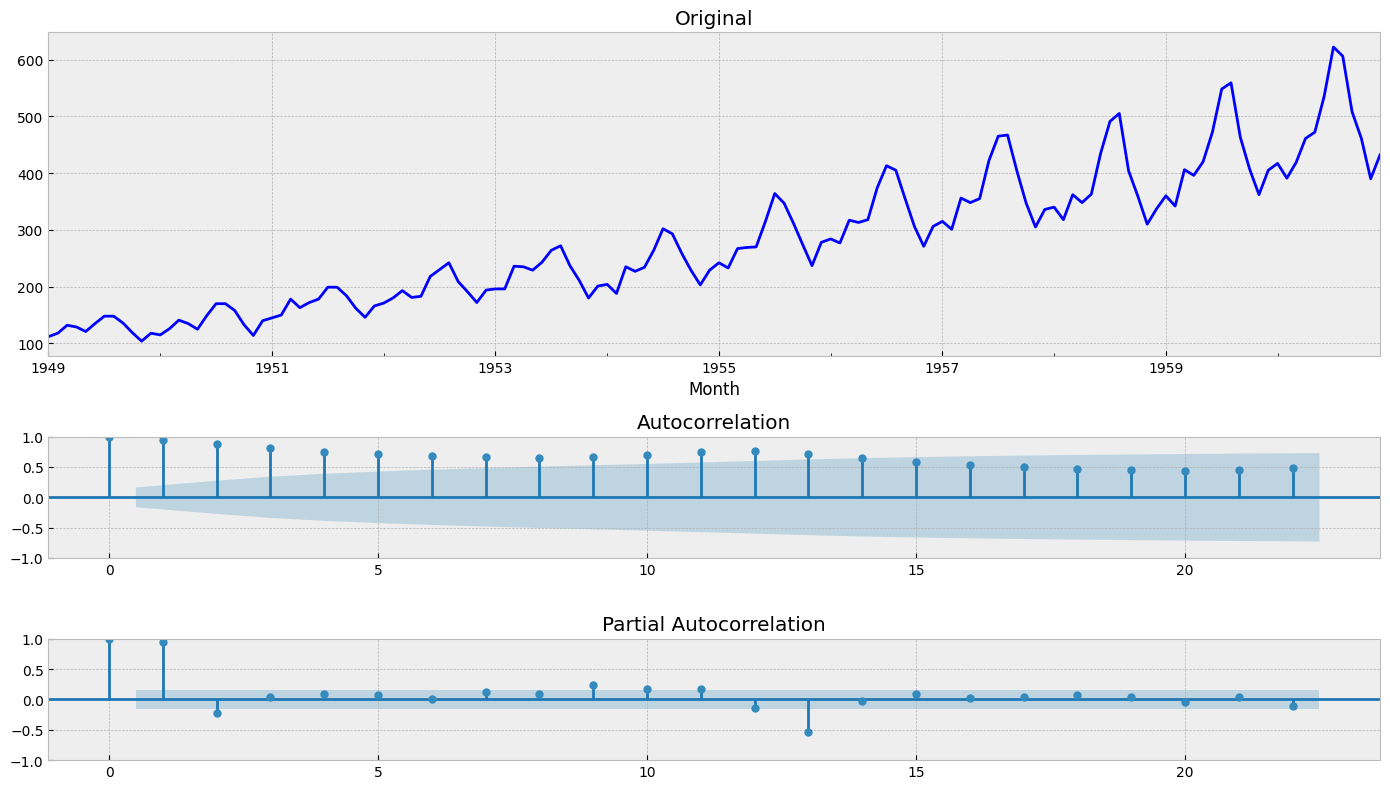

In [44]:
tsplot(series_airline['Count'])

Теперь посмотрим стационарность временного ряда:

In [45]:
adf_test = adfuller(series_airline['Count'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9918802434376409


In [47]:
series_2 = boxcox(series_airline['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


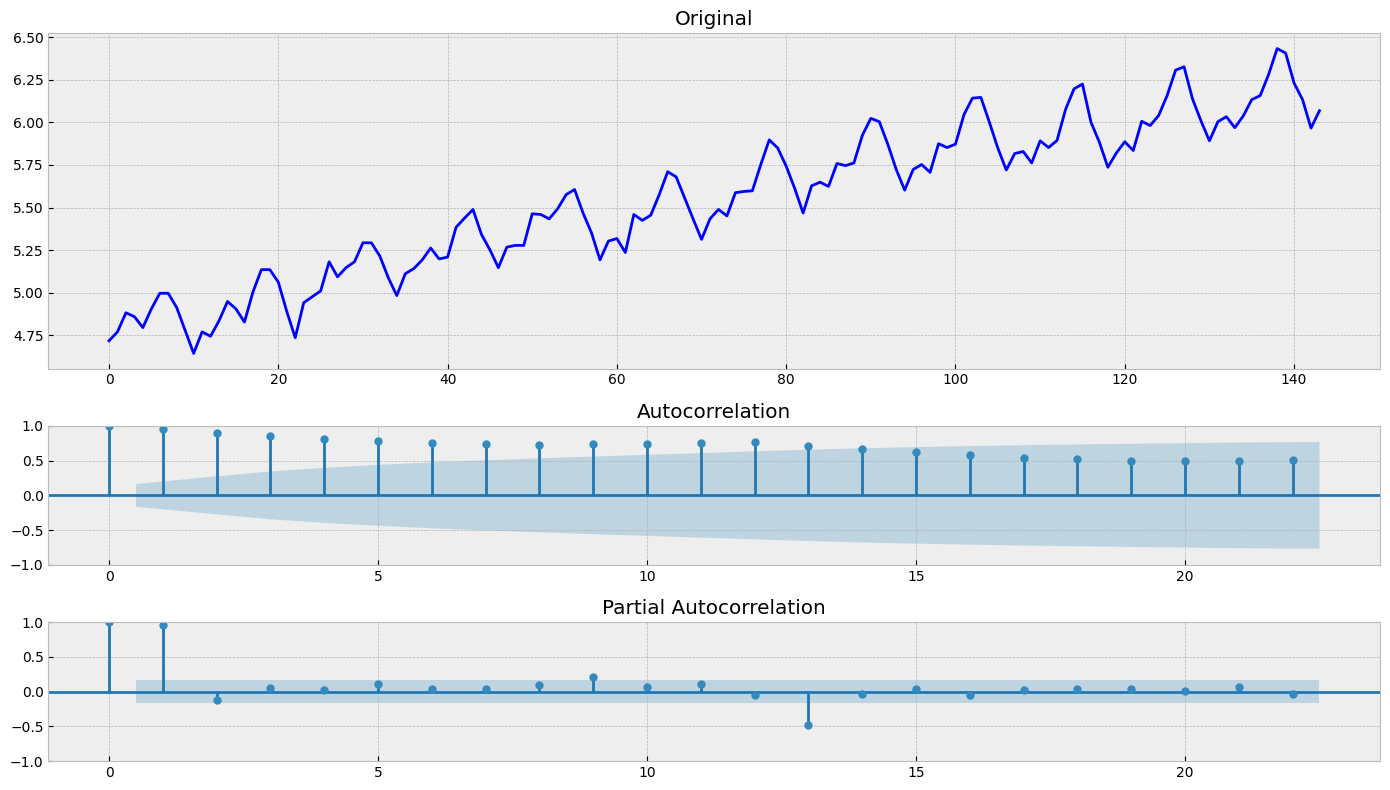

In [48]:
tsplot(series_2)

In [49]:
series_2 = series_2[1:] - series_2[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


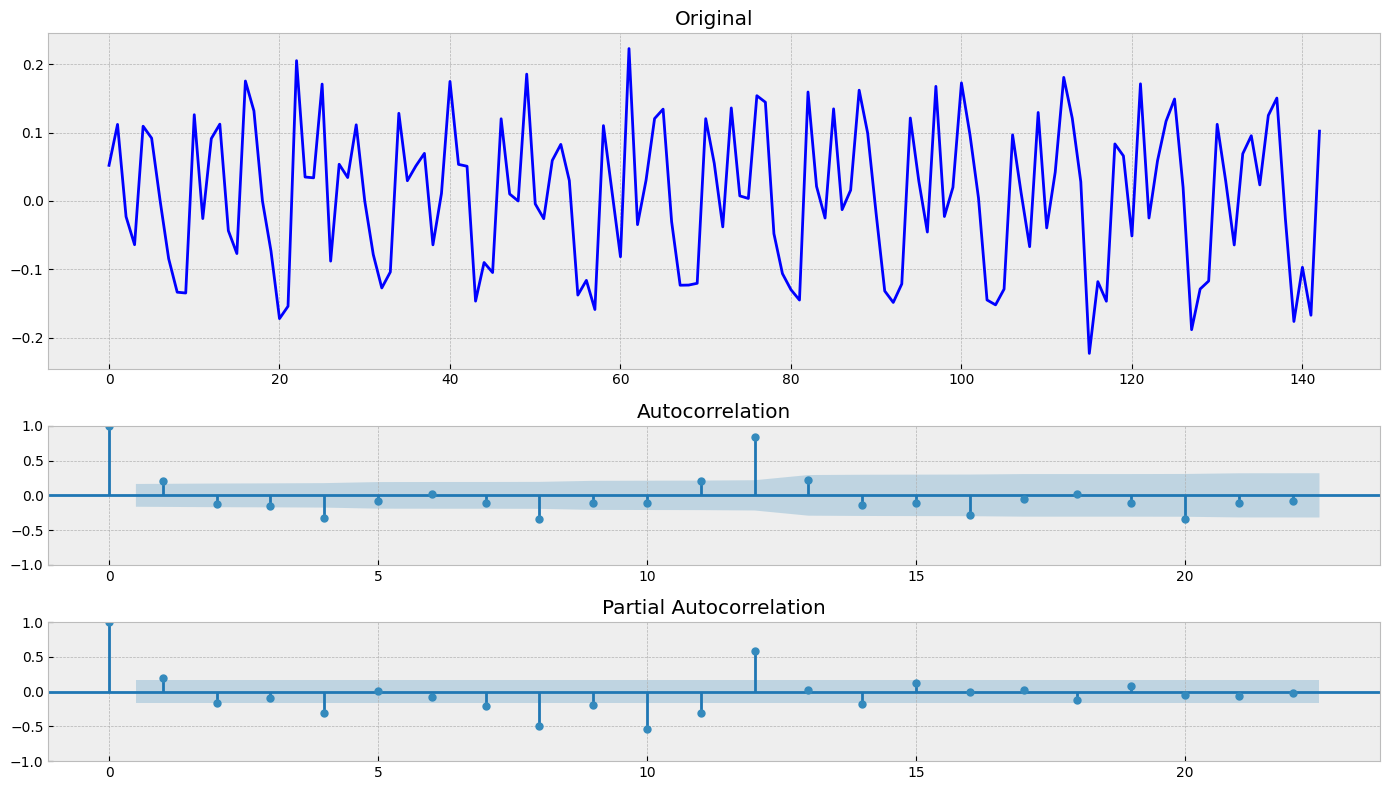

In [50]:
tsplot(series_2)

In [51]:
series_2 = series_2[12:] - series_2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


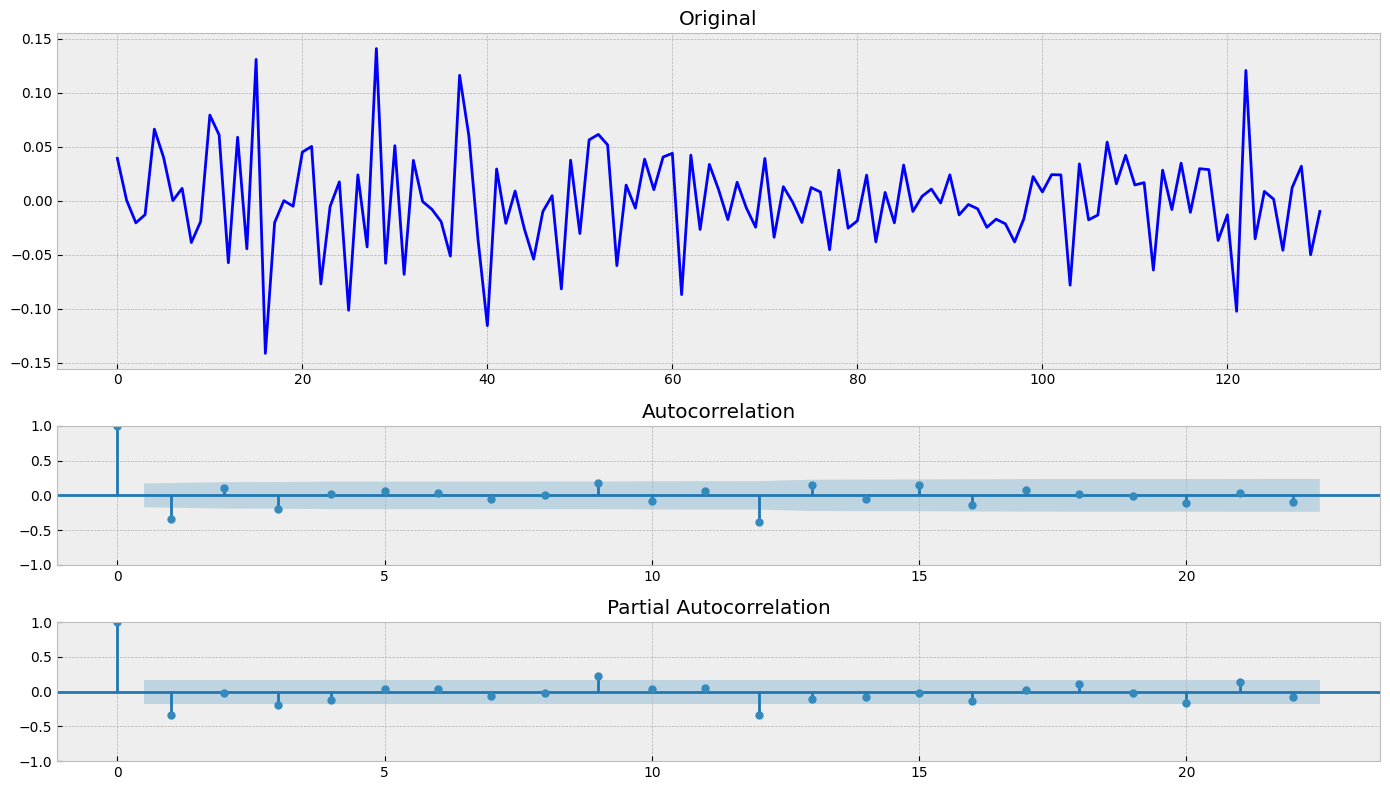

In [52]:
tsplot(series_2)

Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда

### series_monthly_air

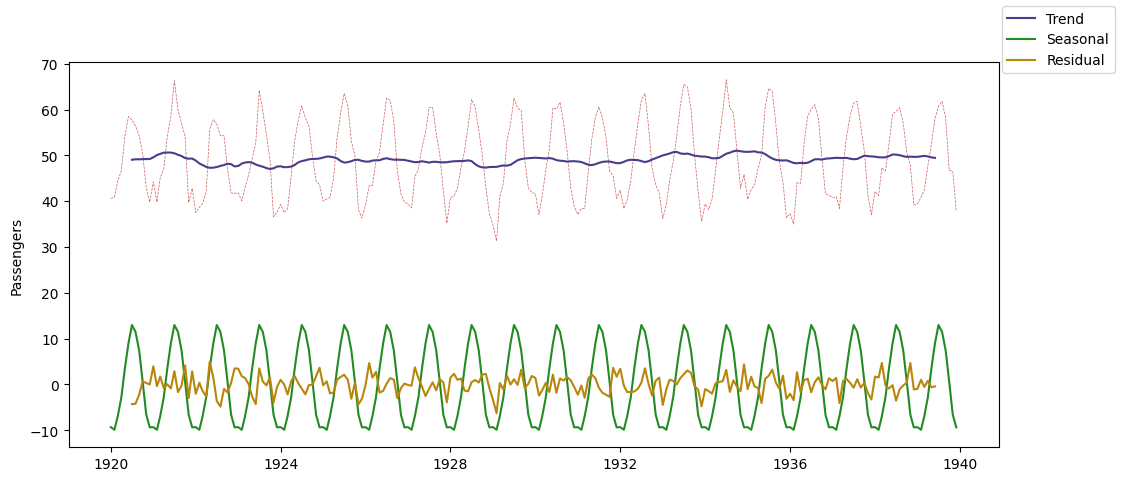

In [53]:
decomposed = seasonal_decompose(series_monthly_air['Deg']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_monthly_air['Deg'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


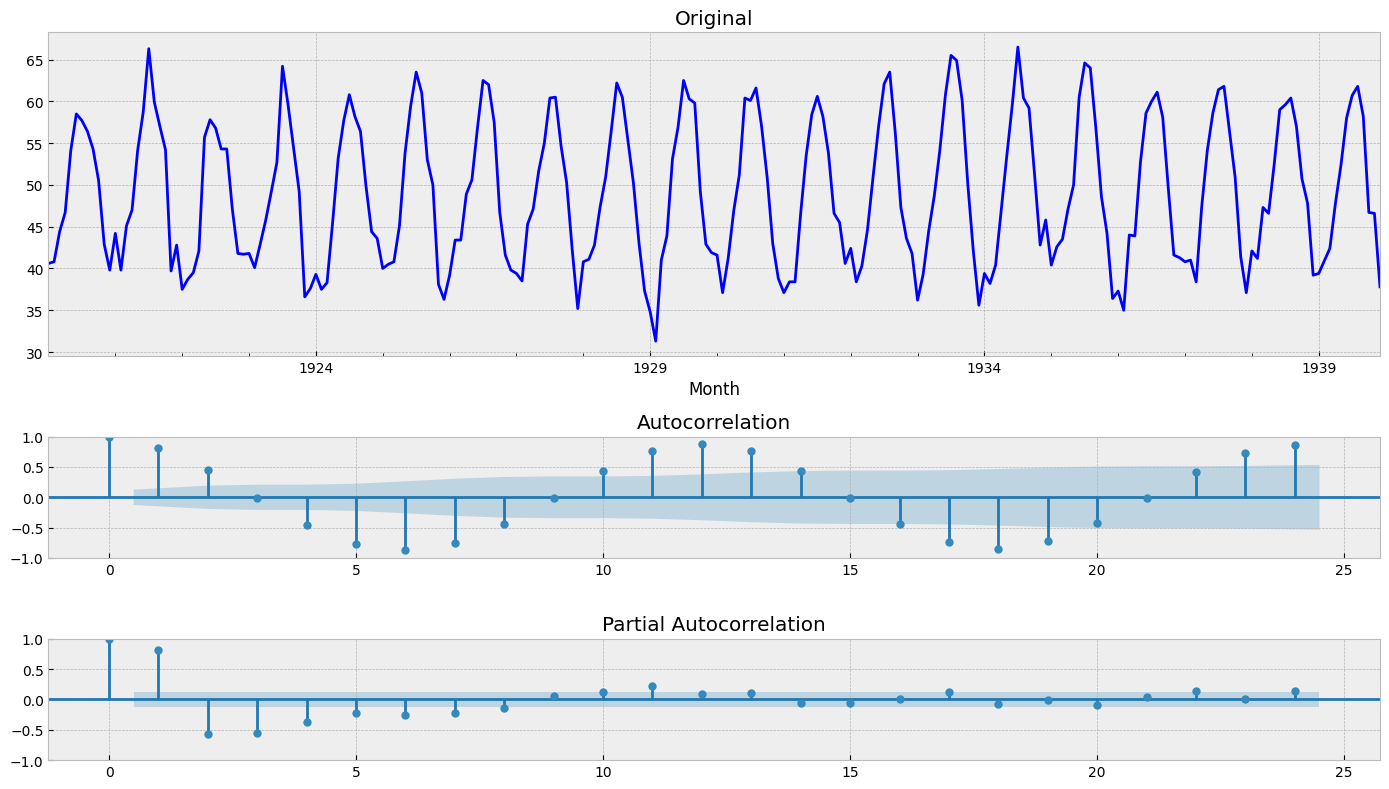

In [54]:
tsplot(series_monthly_air['Deg'])

In [56]:
adf_test = adfuller(series_monthly_air['Deg'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.01698903022260872


Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


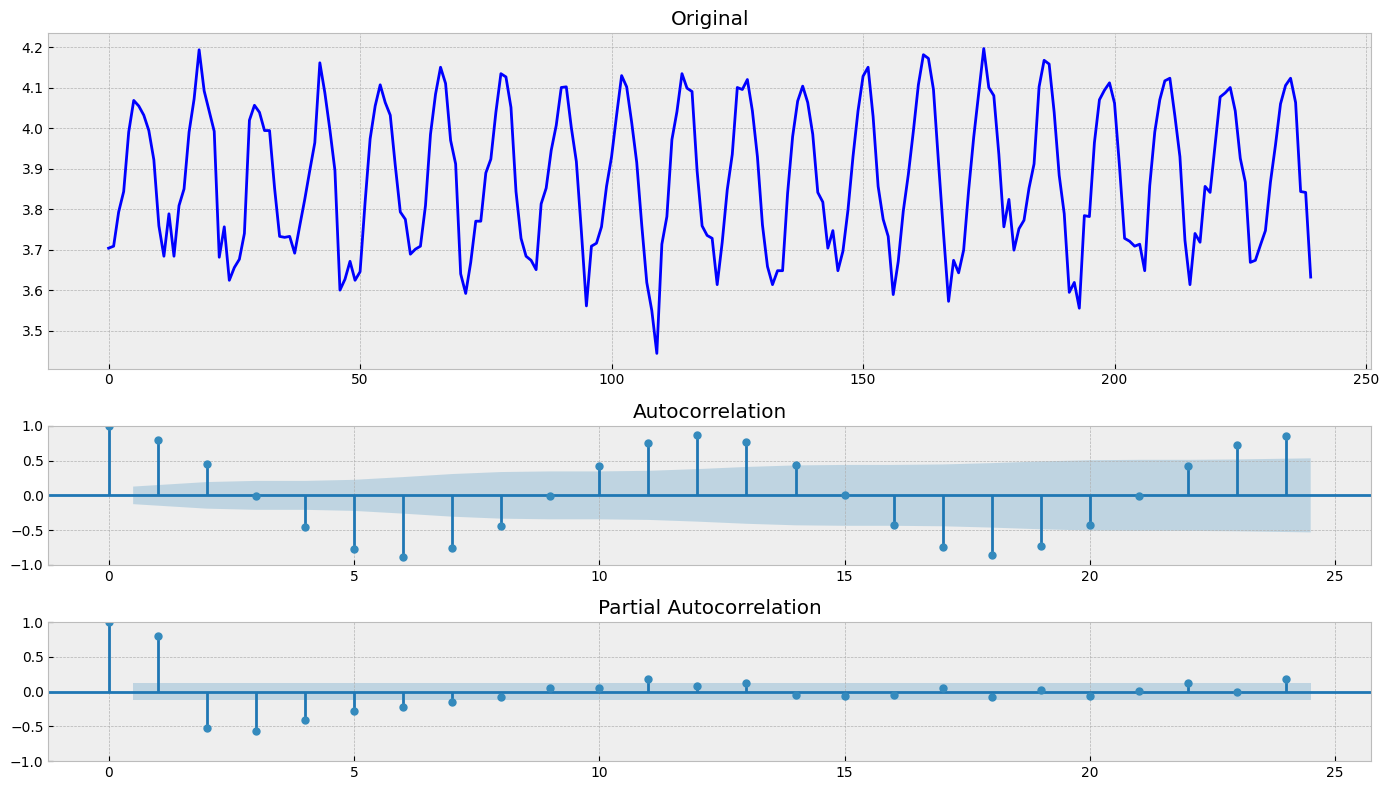

In [60]:
series_3 = boxcox(series_monthly_air['Deg'], 0)
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


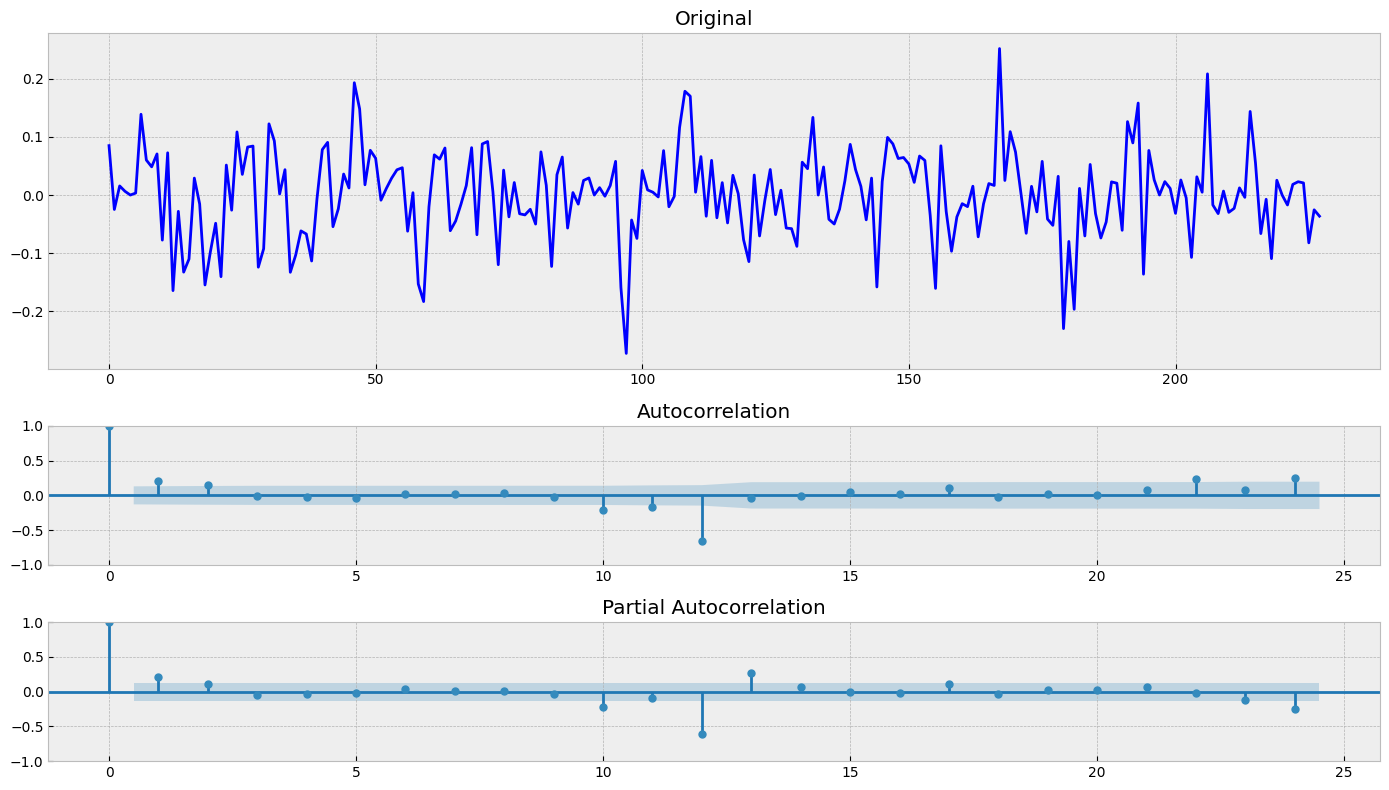

In [61]:
series_3 = series_3[12:] - series_3[:-12]
tsplot(series_3)

Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда

### series_boston

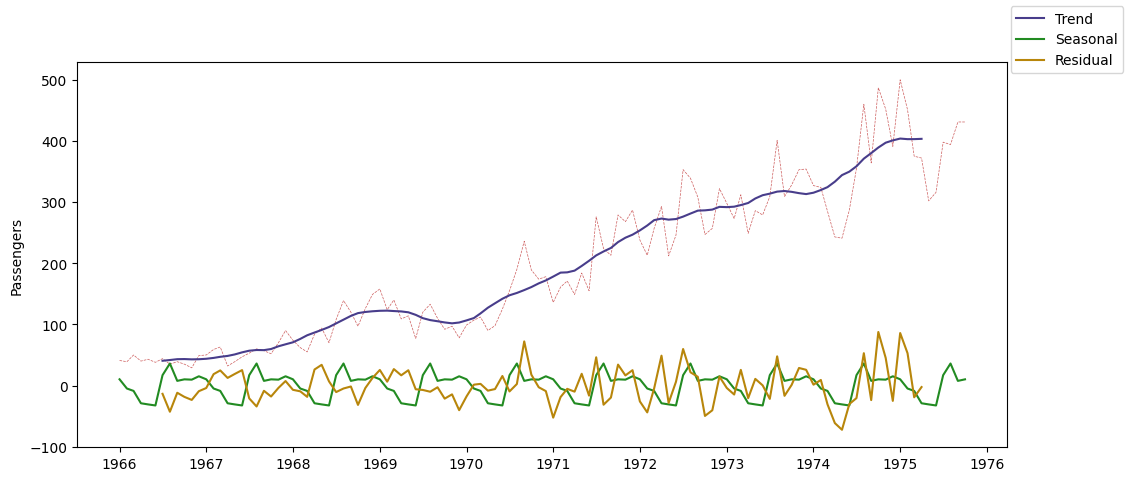

In [62]:
decomposed = seasonal_decompose(series_boston['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_boston['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


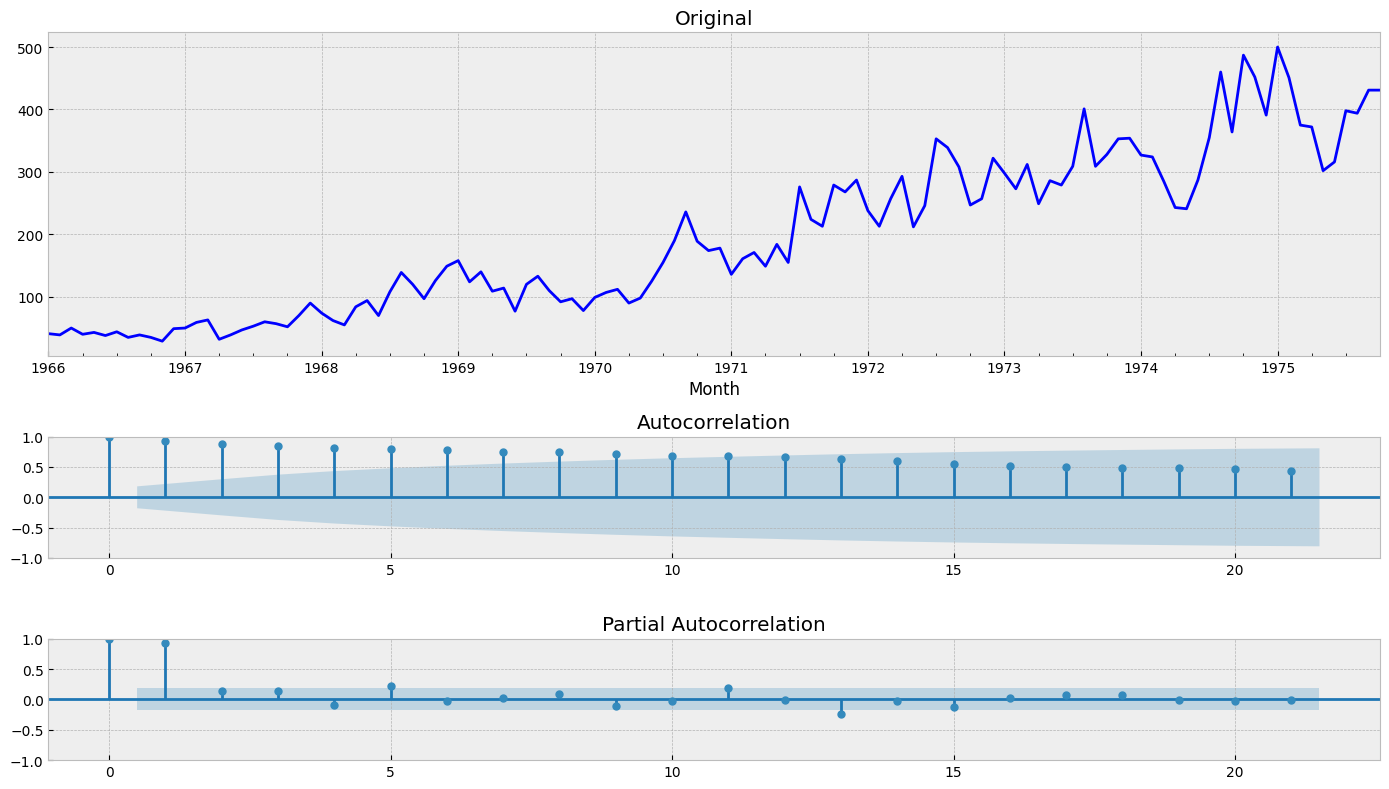

In [63]:
tsplot(series_boston['Count'])

In [64]:
adf_test = adfuller(series_boston['Count'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9942775638057233


Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


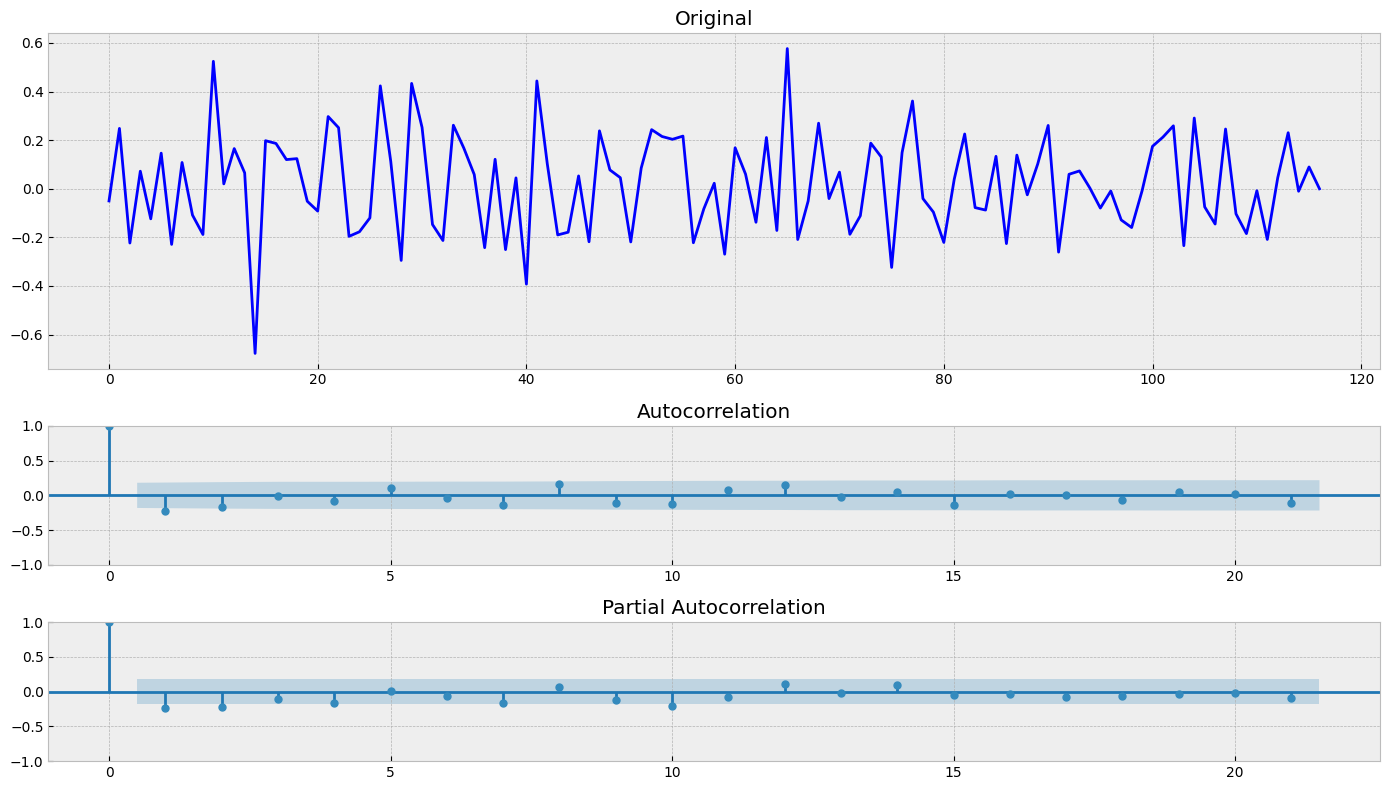

In [65]:
series_4 = boxcox(series_boston['Count'], 0)
series_4 = series_4[1:] - series_4[:-1]

tsplot(series_4)

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


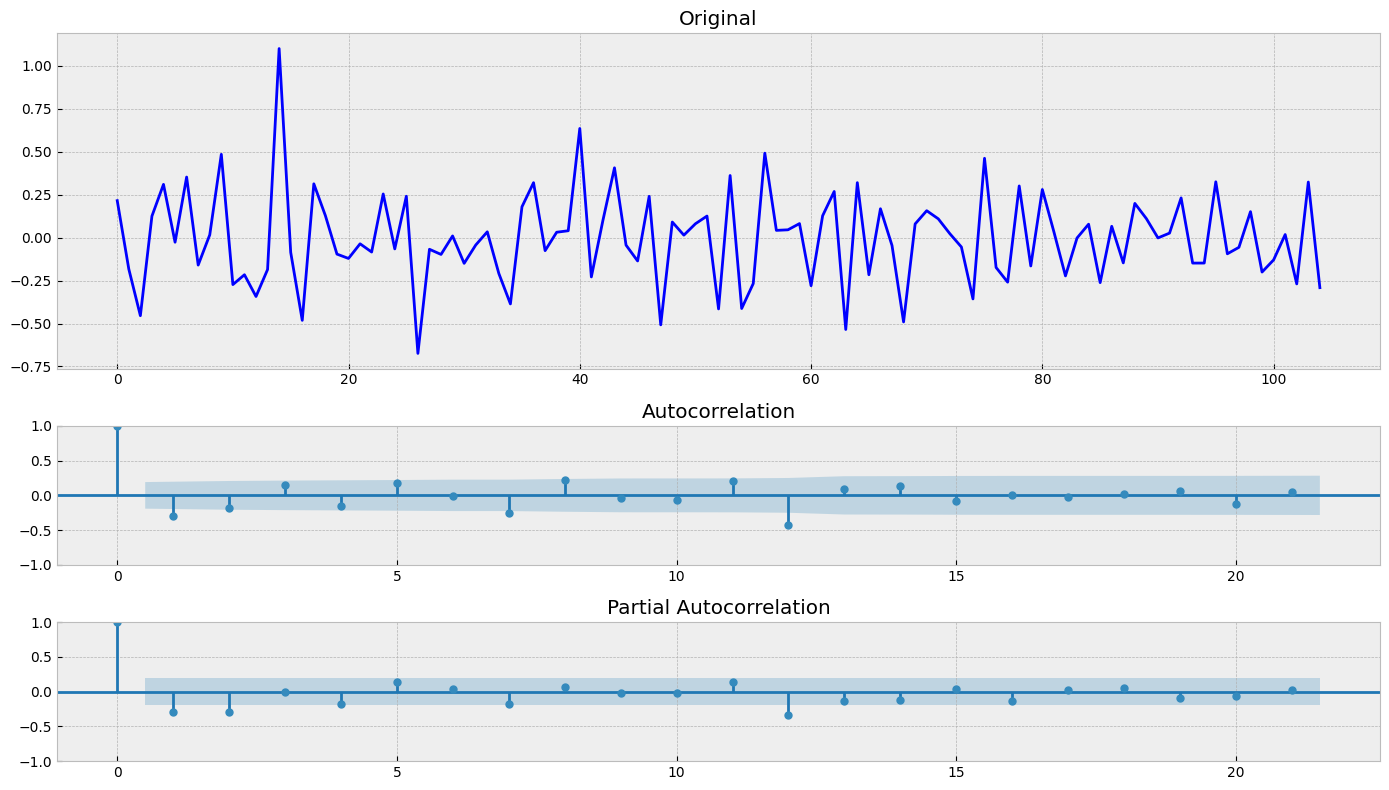

In [71]:
series_4 = series_4[12:] - series_4[:-12]
tsplot(series_4)

In [72]:
adf_test = adfuller(series_4)
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.0005791258821324222


Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда

### series_sales_company

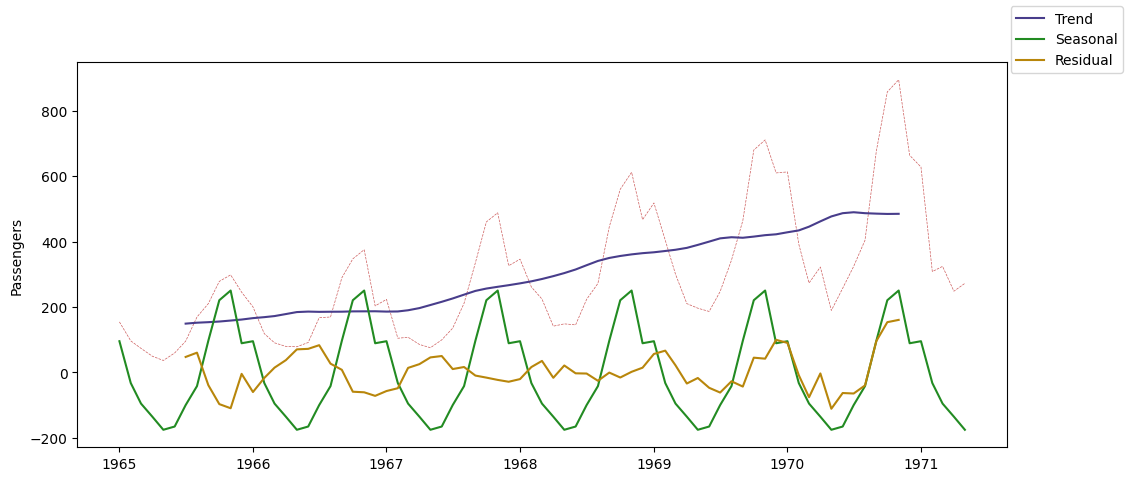

In [67]:
decomposed = seasonal_decompose(series_sales_company['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_sales_company['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


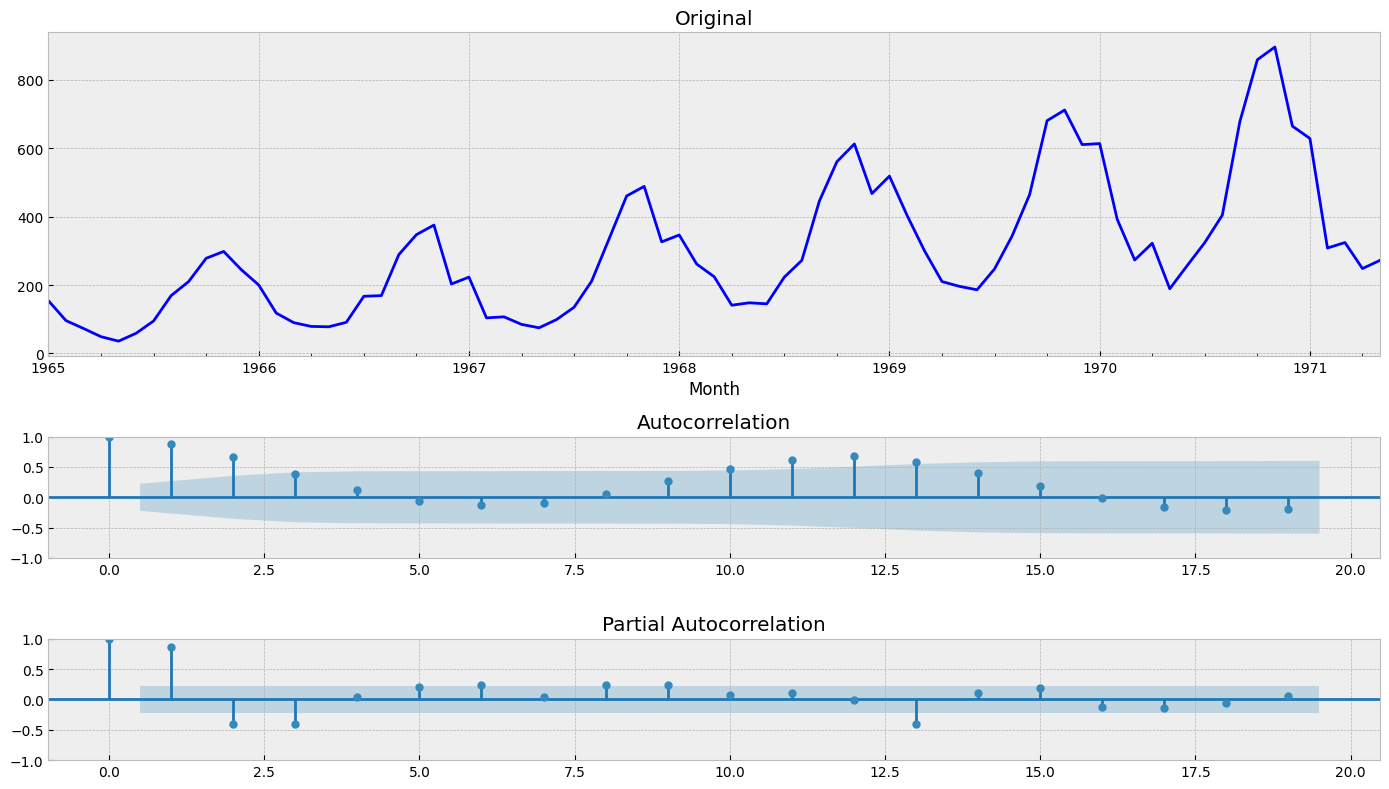

In [68]:
tsplot(series_sales_company['Count'])

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


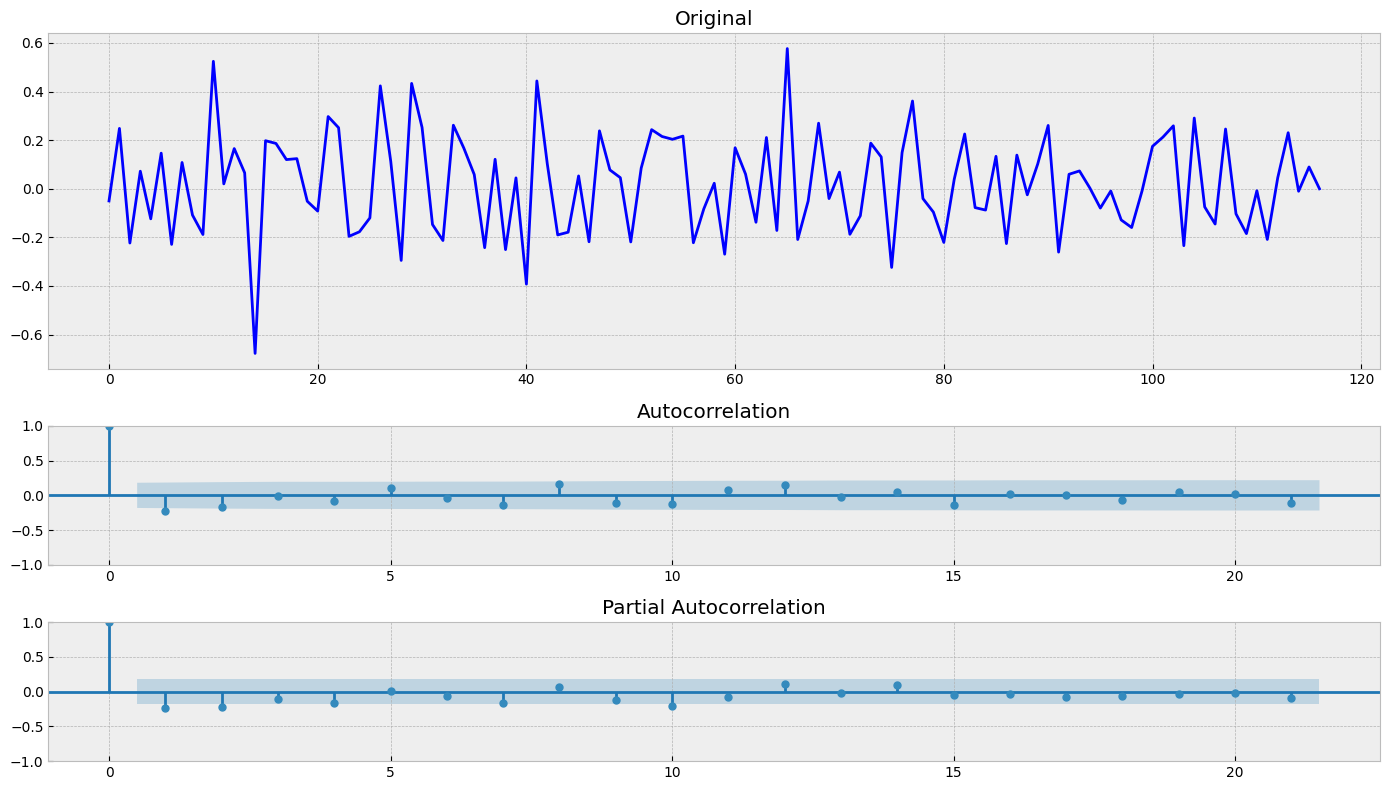

In [69]:
series_5 = boxcox(series_boston['Count'], 0)
series_5 = series_5[1:] - series_5[:-1]

tsplot(series_5)

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


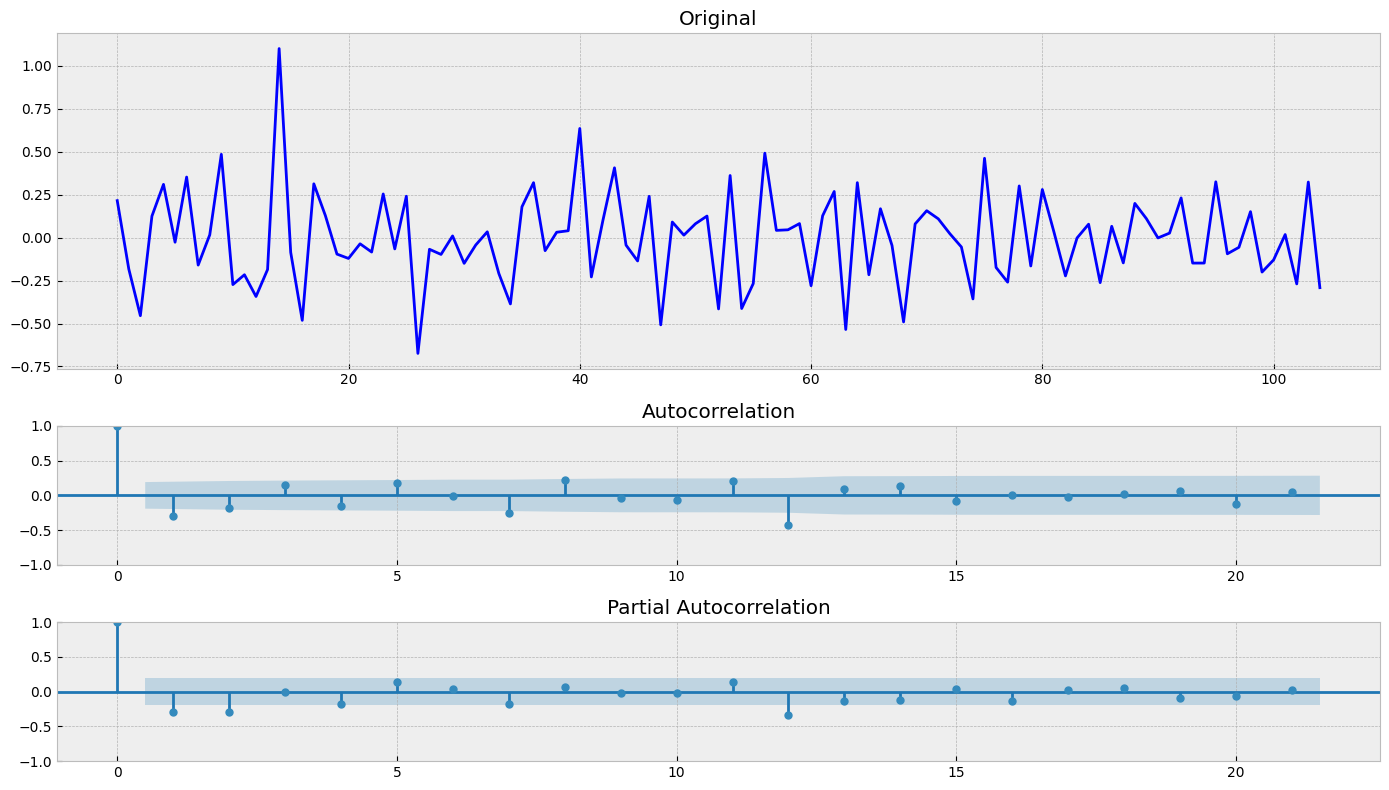

In [73]:
series_5 = series_5[12:] - series_5[:-12]
tsplot(series_5)

Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда

### series_closings

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


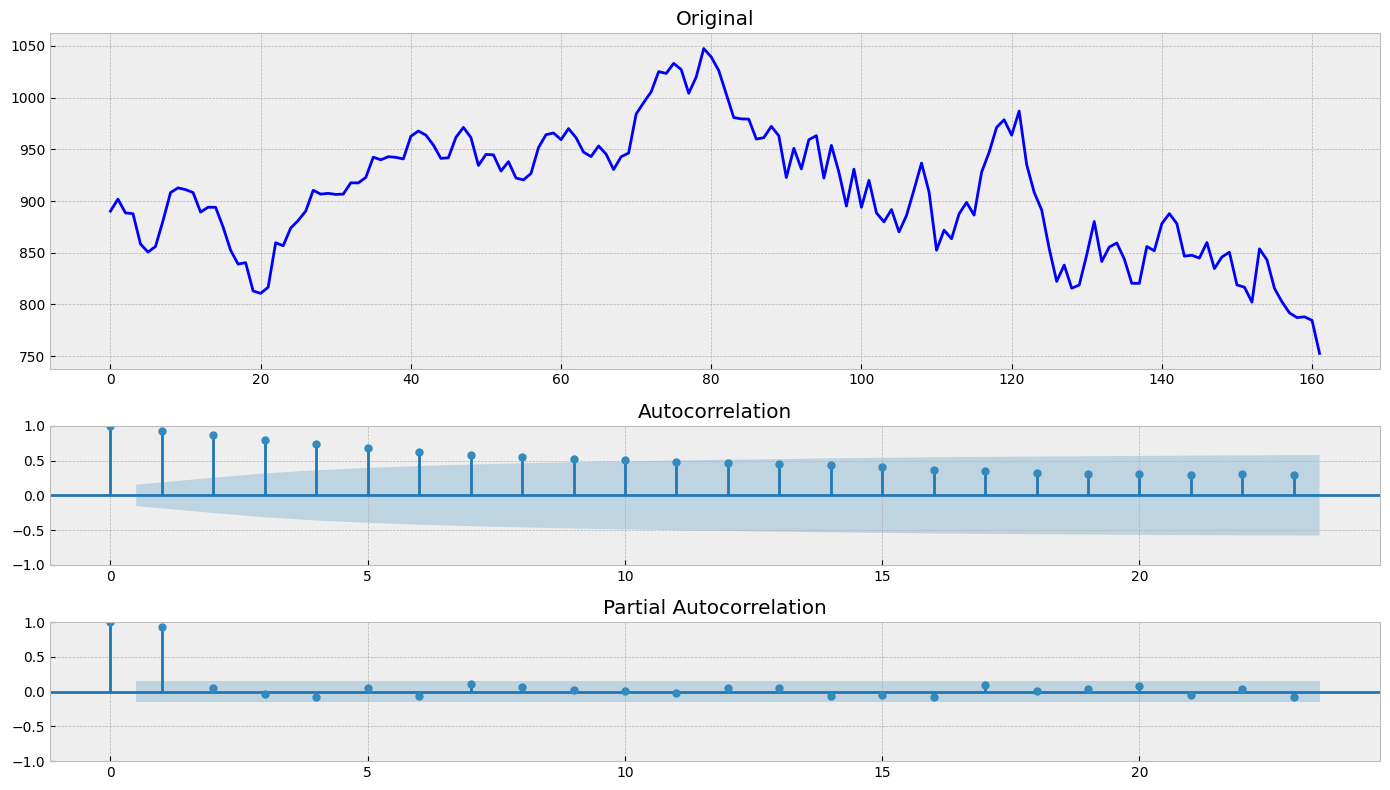

In [76]:
tsplot(series_closings)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


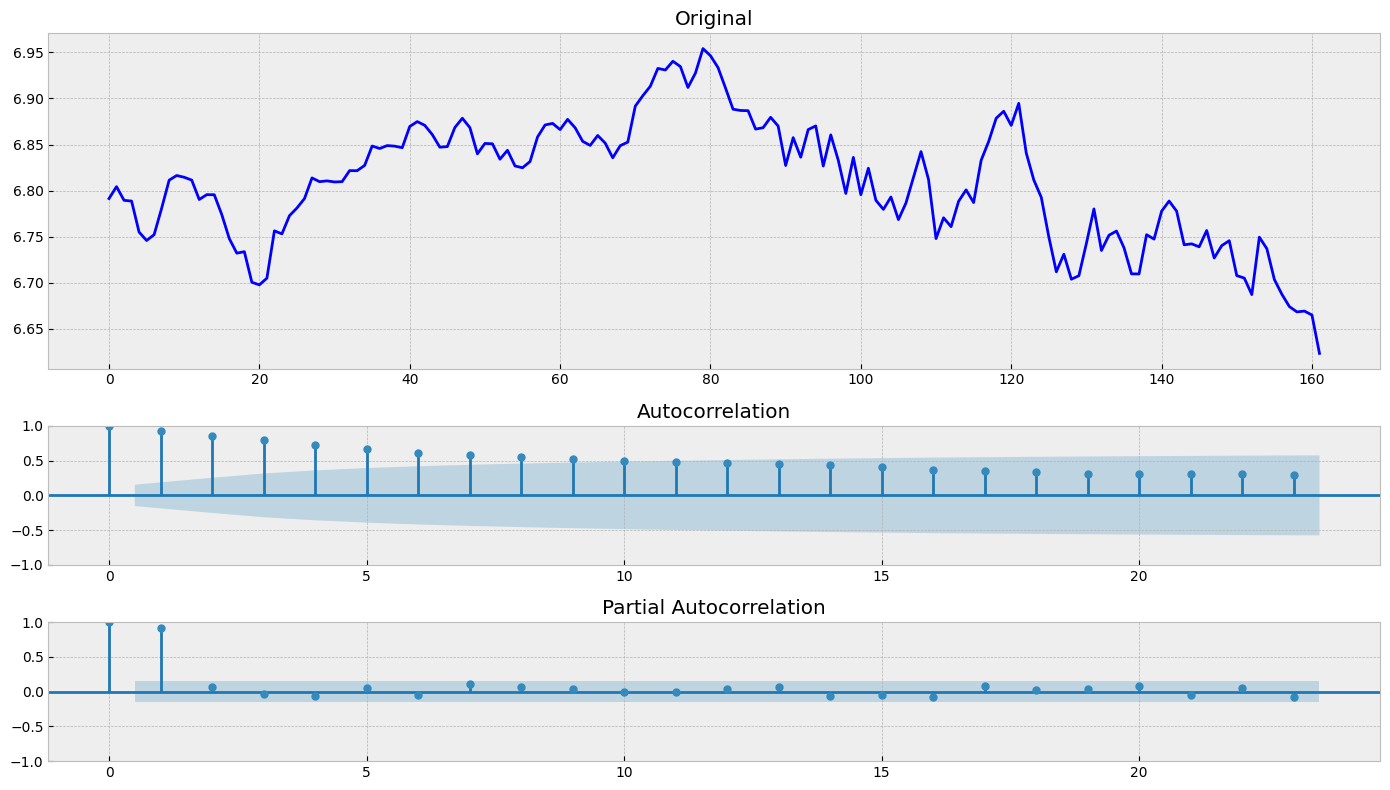

In [78]:
series_6 = boxcox(series_closings, 0)
tsplot(series_6)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


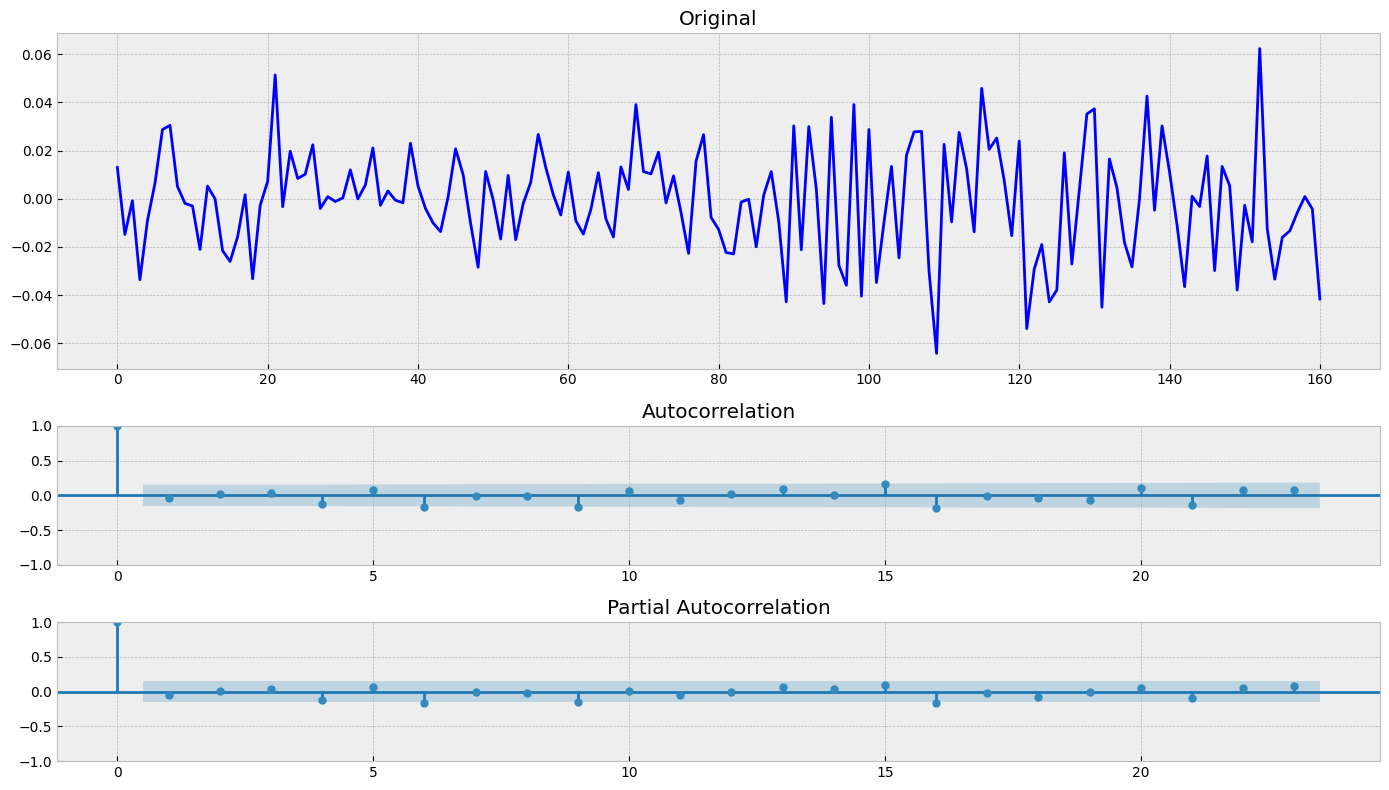

In [79]:
series_6 = series_6[1:] - series_6[:-1]
tsplot(series_6)

Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда